# Simple Scatter Plots

## Scatter Plots with plt.plot

<img src='files/line_marker_type.png' width=350>

In [206]:
%matplotlib inline
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

In [ ]:
rng = np.random.RandomState(0)
for marker in ['.', 
               ',', 
               'o', 
               'v', 
               '^', 
               '<', 
               '>', 
               '1', 
               '2', 
               '3', 
               '4']:
    plt.plot(rng.rand(1), rng.rand(1), marker, markersize=10,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(-0.2, 1.8)
plt.ylim(0, 1.2);

In [ ]:
rng = np.random.RandomState(0)
for marker in ['s',
               'p',
               '*',
               'h',
               'H',
               '+',
               'x',
               'D',
               'd',
               '|',
               '_']:
    plt.plot(rng.rand(1), rng.rand(1), marker, markersize=10,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(-0.2, 1.8)
plt.ylim(0, 1.2);

In [ ]:
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

In [ ]:
plt.plot(x, y, '-p', color='gray', 
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with plt.scatter
* Similar to plt.plot
* <font color=red> The primary difference of *plt.scatter* from *plt.plot* is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

In [ ]:
# similar to plt.plot
plt.scatter(x, y, marker='o')

<font color=red> **The color argument is automatically mapped to a color scale (shown here by the colorbar() command), and the size argument is givin in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to illustrate multidimensional data.** 

In [ ]:
rng = np.random.RandomState(0)
i = 15
x = rng.randn(i)
y = rng.randn(i)
colors = rng.rand(i)
sizes = 1000 * rng.rand(i)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

* simultaneously explore four different dimensions of the data:
    1. the (x, y) location of each point corresponds to the sepal length and width.
    2. the size of the point is related to the pedal width,
    3. the color is related to the particular species of flower.

In [ ]:
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar();

## plot Versus Scatter: A Note on Efficiency

1. For large data set, plt.plot is more efficient than plt.scatter.
2. plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
3. In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
4. plt.plot should be preferred over plt.scatter for large datasets.

# Visualizing Errors

## Basic Errorbars

Signature: plt.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)

Docstring: Plot an errorbar graph.

Plot x versus y with error deltas in yerr and xerr.
Vertical errorbars are plotted if yerr is not None.
Horizontal errorbars are plotted if xerr is not None.

x, y, xerr, and yerr can all be scalars, which plots a
single error bar at x, y.

Parameters

x : scalar or array-like

y : scalar or array-like

xerr/yerr : scalar or array-like, shape(N,) or shape(2,N), optional
    If a scalar number, len(N) array-like object, or a N-element
    array-like object, errorbars are drawn at +/-value relative
    to the data. Default is None.

    If a sequence of shape 2xN, errorbars are drawn at -row1
    and +row2 relative to the data.

fmt : plot format string, optional, default: None
    The plot format symbol. If fmt is 'none' (case-insensitive),
    only the errorbars are plotted.  This is used for adding
    errorbars to a bar plot, for example.  Default is '',
    an empty plot format string; properties are
    then identical to the defaults for :meth:`plot`.

ecolor : mpl color, optional, default: None
    A matplotlib color arg which gives the color the errorbar lines;
    if None, use the color of the line connecting the markers.

elinewidth : scalar, optional, default: None
    The linewidth of the errorbar lines. If None, use the linewidth.

capsize : scalar, optional, default: None
    The length of the error bar caps in points; if None, it will
    take the value from ``errorbar.capsize``
    :data:`rcParam<matplotlib.rcParams>`.

capthick : scalar, optional, default: None
    An alias kwarg to markeredgewidth (a.k.a. - mew). This
    setting is a more sensible name for the property that
    controls the thickness of the error bar cap in points. For
    backwards compatibility, if mew or markeredgewidth are given,
    then they will over-ride capthick. This may change in future
    releases.

barsabove : bool, optional, default: False
    If True , will plot the errorbars above the plot
    symbols. Default is below.

lolims / uplims / xlolims / xuplims : bool, optional, default:None
    These arguments can be used to indicate that a value gives
    only upper/lower limits. In that case a caret symbol is
    used to indicate this. lims-arguments may be of the same
    type as *xerr* and *yerr*.  To use limits with inverted
    axes, :meth:`set_xlim` or :meth:`set_ylim` must be called
    before :meth:`errorbar`.

errorevery : positive integer, optional, default:1
    Subsamples the errorbars. e.g., if errorevery=5, errorbars for
    every 5-th datapoint will be plotted. The data plot itself still
    shows all data points.

Returns

:class:`~.container.ErrorbarContainer`
    The container contains:

    - plotline: :class:`~matplotlib.lines.Line2D` instance of
      x, y plot markers and/or line.
    - caplines: A tuple of :class:`~matplotlib.lines.Line2D` instances
      of the error bar caps.
    - barlinecols: A tuple of
      :class:`~matplotlib.collections.LineCollection` with the
      horizontal and vertical error ranges.

Other Parameters

**kwargs :

    All other keyword arguments are passed on to the plot
    command for the markers. For example, this code makes big red
    squares with thick green edges::

        x,y,yerr = rand(3,10)
        errorbar(x, y, yerr, marker='s', mfc='red',
                 mec='green', ms=20, mew=4)

    where mfc, mec, ms and mew are aliases for the longer
    property names, markerfacecolor, markeredgecolor, markersize
    and markeredgewidth.

    Valid kwargs for the marker properties are

      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
      
  alpha: float (0.0 transparent through 1.0 opaque) 
  
  animated: bool 
  
  antialiased or aa: [True | False] 
  
  clip_box: a `~.Bbox` instance 
  
  clip_on: bool 
  
  clip_path: [(`~matplotlib.path.Path`, `~.Transform`) | `~.Patch` | None] 
  
  color or c: any matplotlib color 
  
  contains: a callable function 
  
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  
  dashes: sequence of on/off ink in points 
  
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  
  figure: a `~.Figure` instance 
  
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  
  gid: an id string 
  
  label: object 
  
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  
  linewidth or lw: float value in points 
  
  marker: :mod:`A valid marker style <matplotlib.markers>`
  
  markeredgecolor or mec: any matplotlib color 
  
  markeredgewidth or mew: float value in points 
  
  markerfacecolor or mfc: any matplotlib color 
  
  markerfacecoloralt or mfcalt: any matplotlib color 
  
  markersize or ms: float 
  
  markevery: [None | int | length-2 tuple of int | slice | list/array of int | float | length-2 tuple of float]
  
  path_effects: `~.AbstractPathEffect` 
  
  picker: float distance in points or callable pick function ``fn(artist, event)`` 
  
  pickradius: float distance in points
  
  rasterized: bool or None 
  
  sketch_params: (scale: float, length: float, randomness: float) 
  
  snap: bool or None 
  
  solid_capstyle: ['butt' | 'round' |  'projecting'] 
  
  solid_joinstyle: ['miter' | 'round' | 'bevel'] 
  
  transform: a :class:`matplotlib.transforms.Transform` instance 
  
  url: a url string 
  
  visible: bool 
  
  xdata: 1D array 
  
  ydata: 1D array 
  
  zorder: float 

.. note::
    In addition to the above described arguments, this function can take a
    **data** keyword argument. If such a **data** argument is given, the
    following arguments are replaced by **data[<arg>]**:

    * All arguments with the following names: 'x', 'xerr', 'y', 'yerr'.

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

In [ ]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

## Continuous Errors

In [ ]:
from sklearn.gaussian_process import GaussianProcess

In [ ]:
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

In [ ]:
# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                    random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

* we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

* The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: 
    * in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors. 
    * In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

(0, 10)

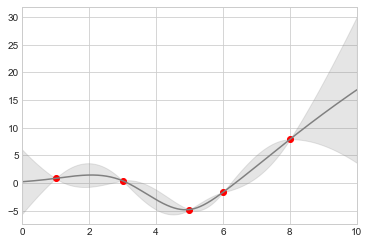

In [91]:
# Visualize the results
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color='gray', alpha=0.2)
plt.xlim(0, 10)

# Density and Contour Plots

1. Display 3D data in 2D using contours or color-coded regions
2. Three Matplotlib functions:
    1. plt.contour for contour plots
    2. plt.contourf for filled contour plots
    3. plt.imshow for showing images
    
## Visualizing a Three-Dimensional Function

1. plt.contour
    a. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. 
    b. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. 
    c. Use the np.meshgrid function builds two-dimensional grids from one-dimensional arrays

In [92]:
plt.style.use('seaborn-white')

In [93]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [102]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

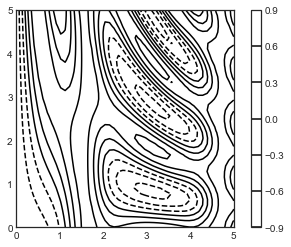

In [128]:
plt.contour(X, Y, Z, colors='black')
plt.axis('square')
plt.colorbar();

# by default when a single color is used, 
# negative values are represented by dashed lines,
# and positive values by solid lines.

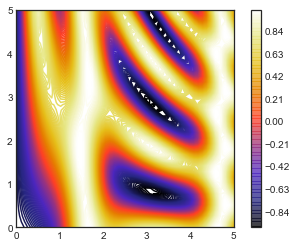

In [158]:
# use a colormap
plt.contour(X, Y, Z, 200, cmap='CMRmap') # '20', # of equally spaced intervals
plt.axis('square')
plt.colorbar();

<img src="files/colormaps.png">

In [141]:
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Vega10',
 'Vega10_r',
 'Vega20',
 'Vega20_r',
 'Vega20b',
 'Vega20b_r',
 'Vega20c',
 'Vega20c_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '__builtins__',
 '__cached__',
 '__doc__',
 '_

In [136]:
len(dir(plt.cm))

200

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega20c colormap was deprecated in version 2.0. Use tab20c instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cb

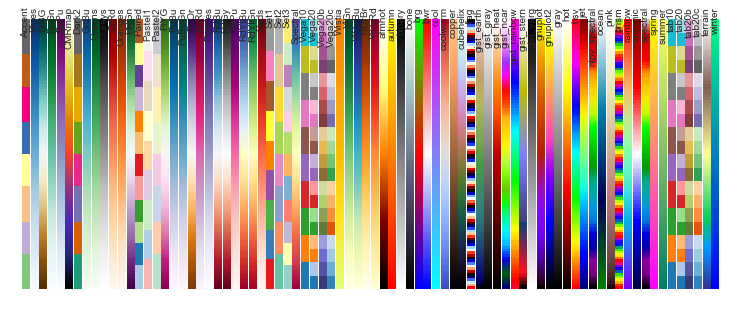

In [157]:
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=10)
savefig("colormaps.png",dpi=2**10)

* filled contour plot: plt.contourf()

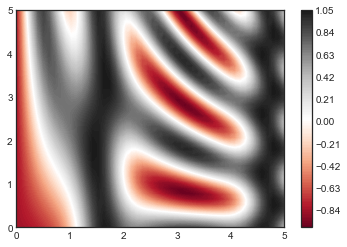

In [160]:
plt.contourf(X, Y, Z, 200, cmap='RdGy')
plt.colorbar();

#### plt.imshow() function interprets a two-dimensional grid of data as an image

1. plt.imshow() doesn't accept an x and y grid, so you must manually specify the extent [xmin, xman, ymin, ymax] of the image on the plot

2. plt.imshow() by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.

3. plt.imshow() will automatically adjust the axis aspect ratio to match the input data; you can change this by setting, for example, plt.axis(aspect='image') to make x and y unit match.

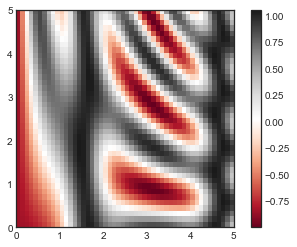

In [161]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

#### Combine contour plots and image plots

we’ll use a partially transparent background image (with transparency set via the alpha parameter) and over-plot contours with labels on the contours themselves (using the plt.clabel() function)

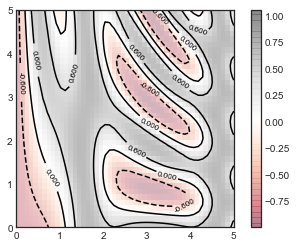

In [164]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.3)
plt.colorbar();

# Histograms, Binnings, and Density

In [173]:
plt.hist?

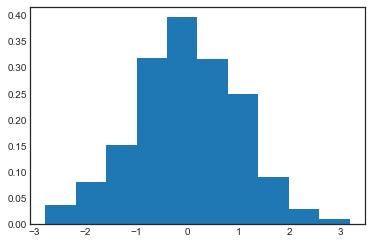

In [195]:
data = np.random.randn(500)
plt.hist(data, bins=10, density=True, histtype='stepfilled', 
         orientation='vertical',
        rwidth = 0.001);

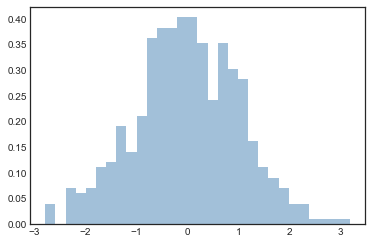

In [196]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

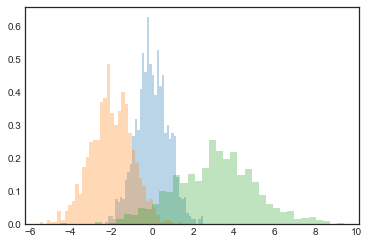

In [198]:
x1 = np.random.normal(0, 0.8, 1000);
x2 = np.random.normal(-2, 1, 1000);
x3 = np.random.normal(3, 2, 1000);

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## 2D Histograms and Binnings
* Create histograms in 2D by dividing points among 2D bins

### plt.hist2d: Two-dimensional histogram

In [199]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

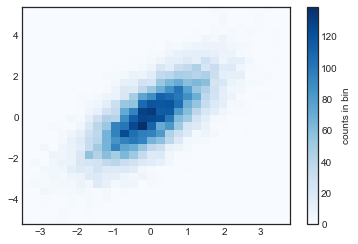

In [202]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [203]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### plt.hexbin: Hexagonal binnings
1. The two-dimensional histogram creates a tessellation of squares across the axes.
2. Another natural shape for such a tessellation is the regular hexagon.

In [204]:
plt.hexbin?

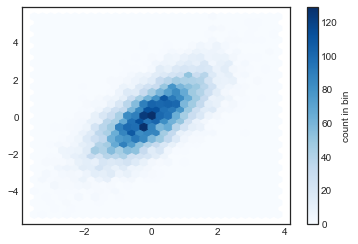

In [205]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation (KDE)
1. Evaluating densities in multiple dimensions

In [210]:
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

In [211]:
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

* `flatten` always returns a copy.
* `ravel` returns a view of the original array whenever possible. This isn't visible in the printed output, but if you modify the array returned by ravel, it may modify the entries in the original array. If you modify the entries in an array returned from flatten this will never happen. ravel will often be faster since no memory is copied, but you have to be more careful about modifying the array it returns.
* `reshape((-1,))` gets a view whenever the strides of the array allow it even if that means you don't always get a contiguous array.

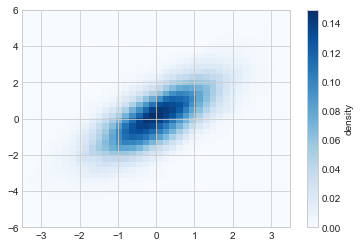

In [216]:
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')